In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tushare as ts
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
import seaborn as sns

print("tensorflow version : %s" % tf.__version__)
print("keras version : %s" % keras.__version__)
print("tushare version : %s" % ts.__version__)

tensorflow version : 2.2.0
keras version : 2.3.0-tf
tushare version : 1.2.59


In [26]:
data_path = "../data/stock_2000_2019_daily_t10"

def norm_code(code):
    code = str(code)
    l = 6 - len(code)
    return '0' * l + code

def load_data(data_file):
    df = pd.read_csv(data_file)
    df['code'] = df['code'].apply(norm_code)
    df['key'] = df['code'] + ':' + df['date']
    df = df.set_index('key')
    return df

def process_data(df):
    df['incr'] = df['high'].rolling(10).max().shift(-10) / df['close'] - 1
    df['label'] = df['incr'].apply(lambda x: 1 if x > 0.1 else 0)
    df = df[['label', 'incr', 'date', 'open', 'close', 'high', 'low', 'volume']]
    df = df.dropna()
    for f in ['open', 'close', 'high', 'low', 'volume']:
        for i in range(60):
            df[f+'_'+str(i)] = df[f].shift(i)
    df = df.drop(['incr', 'date', 'open', 'close', 'high', 'low', 'volume'], axis=1)
    df = df.dropna()
    return df

merge_df = pd.DataFrame()
for file in os.listdir(data_path):
    f = os.path.join(data_path, file)
    df = load_data(f)
    df = process_data(df)
    merge_df = merge_df.append(df)

merge_df

,label,open_0,open_1,open_2,open_3,open_4,open_5,open_6,open_7,open_8,...,volume_50,volume_51,volume_52,volume_53,volume_54,volume_55,volume_56,volume_57,volume_58,volume_59
key,,,,,,,,,,,,,,,,,,,,,
000001:2000-04-10,0,4.193,4.098,4.058,3.992,4.032,4.054,4.095,4.069,4.146,...,34501.08,55972.79,50058.62,91752.99,126663.26,185210.78,229346.33,120222.09,93993.15,82160.86
000001:2000-04-11,0,4.157,4.193,4.098,4.058,3.992,4.032,4.054,4.095,4.069,...,46563.68,34501.08,55972.79,50058.62,91752.99,126663.26,185210.78,229346.33,120222.09,93993.15
000001:2000-04-12,0,4.190,4.157,4.193,4.098,4.058,3.992,4.032,4.054,4.095,...,37811.34,46563.68,34501.08,55972.79,50058.62,91752.99,126663.26,185210.78,229346.33,120222.09
000001:2000-04-13,0,4.223,4.190,4.157,4.193,4.098,4.058,3.992,4.032,4.054,...,58437.72,37811.34,46563.68,34501.08,55972.79,50058.62,91752.99,126663.26,185210.78,229346.33
000001:2000-04-14,0,4.223,4.223,4.190,4.157,4.193,4.098,4.058,3.992,4.032,...,86262.46,58437.72,37811.34,46563.68,34501.08,55972.79,50058.62,91752.99,126663.26,185210.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
000011:2019-12-11,0,9.040,9.150,9.130,9.170,9.060,9.020,9.000,9.010,9.010,...,33176.00,48647.00,77317.00,24464.00,24592.00,19324.00,38383.00,37268.00,32254.00,48882.00
000011:2019-12-12,0,9.200,9.040,9.150,9.130,9.170,9.060,9.020,9.000,9.010,...,39643.00,33176.00,48647.00,77317.00,24464.00,24592.00,19324.00,38383.00,37268.00,32254.00
000011:2019-12-13,0,9.200,9.200,9.040,9.150,9.130,9.170,9.060,9.020,9.000,...,17550.00,39643.00,33176.00,48647.00,77317.00,24464.00,24592.00,19324.00,38383.00,37268.00


In [27]:
merge_df.describe()

,label,open_0,open_1,open_2,open_3,open_4,open_5,open_6,open_7,open_8,...,volume_50,volume_51,volume_52,volume_53,volume_54,volume_55,volume_56,volume_57,volume_58,volume_59
count,43887.000000,43887.000000,43887.000000,43887.000000,43887.000000,43887.000000,43887.000000,43887.000000,43887.000000,43887.000000,...,4.388700e+04,4.388700e+04,4.388700e+04,4.388700e+04,4.388700e+04,4.388700e+04,4.388700e+04,4.388700e+04,4.388700e+04,4.388700e+04
mean,0.271880,6.944339,6.943531,6.942659,6.941783,6.940927,6.940108,6.939269,6.938393,6.937547,...,1.947945e+05,1.947304e+05,1.946863e+05,1.946297e+05,1.945514e+05,1.944846e+05,1.944314e+05,1.943391e+05,1.942420e+05,1.941816e+05
std,0.444933,5.989504,5.988301,5.987179,5.986074,5.984971,5.983901,5.982786,5.981627,5.980478,...,4.220414e+05,4.219960e+05,4.219793e+05,4.219478e+05,4.218716e+05,4.217894e+05,4.217548e+05,4.216608e+05,4.214898e+05,4.214168e+05
min,0.000000,0.372000,0.372000,0.372000,0.372000,0.372000,0.372000,0.372000,0.372000,0.372000,...,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01
25%,0.000000,2.939500,2.939000,2.938000,2.935500,2.933000,2.933000,2.930500,2.930000,2.930000,...,1.232427e+04,1.231275e+04,1.230655e+04,1.230460e+04,1.229949e+04,1.229505e+04,1.229155e+04,1.228067e+04,1.227100e+04,1.226349e+04
50%,0.000000,5.600000,5.600000,5.600000,5.600000,5.600000,5.600000,5.600000,5.600000,5.600000,...,4.656500e+04,4.655721e+04,4.651500e+04,4.647596e+04,4.642598e+04,4.642160e+04,4.639831e+04,4.635600e+04,4.633400e+04,4.628400e+04
75%,1.000000,8.900000,8.900000,8.900000,8.900000,8.900000,8.900000,8.899000,8.899000,8.898000,...,1.823485e+05,1.822273e+05,1.821236e+05,1.820585e+05,1.819851e+05,1.818564e+05,1.818060e+05,1.817380e+05,1.815840e+05,1.815714e+05
max,1.000000,50.190000,50.190000,50.190000,50.190000,50.190000,50.190000,50.190000,50.190000,50.190000,...,1.028373e+07,1.028373e+07,1.028373e+07,1.028373e+07,1.028373e+07,1.028373e+07,1.028373e+07,1.028373e+07,1.028373e+07,1.028373e+07


In [31]:
train_data = merge_df.sample(frac=0.8,random_state=0)
test_data = merge_df.drop(train_data.index)

train_stat = train_data.describe()
train_stat.pop('label')
train_stat = train_stat.transpose()

train_label = train_data.pop('label')
test_label = test_data.pop('label')

def norm(x):
    return (x - train_stat['mean']) / train_stat['std']

normed_train_data = norm(train_data)
normed_test_data = norm(test_data)

train_stat

,count,mean,std,min,25%,50%,75%,max
open_0,35110.0,6.930359,5.980857,0.372,2.9200,5.5880,8.900,50.19
open_1,35110.0,6.929459,5.979652,0.372,2.9200,5.5865,8.900,50.19
open_2,35110.0,6.928754,5.977482,0.372,2.9260,5.5850,8.892,50.19
open_3,35110.0,6.928037,5.975219,0.372,2.9200,5.5860,8.895,50.19
open_4,35110.0,6.926434,5.974052,0.372,2.9200,5.5900,8.899,49.80
...,...,...,...,...,...,...,...,...
volume_55,35110.0,194824.487252,424192.801251,30.000,12215.7500,46345.0000,181166.750,10283727.00
volume_56,35110.0,194686.950502,421846.211065,30.000,12272.3975,46473.9500,180998.755,10283727.00
volume_57,35110.0,194671.173391,423632.862195,48.000,12272.3975,46333.4650,182416.250,10283727.00
volume_58,35110.0,194079.961579,420051.066610,30.000,12219.2075,46028.6200,181255.750,10283727.00


In [34]:
model = keras.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=[len(train_data.keys())], kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

history = model.fit(train_data, train_label, epochs=100, validation_split=0.2, callbacks=keras.callbacks.TensorBoard("./dsa.tb"))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                19264     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                1040      
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 20,321
Trainable params: 20,321
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
878/878 [==============================] - 3s 4ms/step - loss: 1671.5958 - accuracy: 0.6933 - val_loss: 

878/878 [==============================] - 6s 6ms/step - loss: 0.5951 - accuracy: 0.7250 - val_loss: 0.5882 - val_accuracy: 0.7317
Epoch 51/100
878/878 [==============================] - 11s 12ms/step - loss: 0.5959 - accuracy: 0.7250 - val_loss: 0.5879 - val_accuracy: 0.7317
Epoch 52/100
878/878 [==============================] - 6s 7ms/step - loss: 1.4345 - accuracy: 0.7250 - val_loss: 0.5889 - val_accuracy: 0.7317
Epoch 53/100
878/878 [==============================] - 4s 5ms/step - loss: 0.5951 - accuracy: 0.7250 - val_loss: 0.5884 - val_accuracy: 0.7317
Epoch 54/100
878/878 [==============================] - 5s 5ms/step - loss: 0.6311 - accuracy: 0.7250 - val_loss: 0.5881 - val_accuracy: 0.7317
Epoch 55/100
878/878 [==============================] - 5s 5ms/step - loss: 0.5945 - accuracy: 0.7250 - val_loss: 0.5877 - val_accuracy: 0.7317
Epoch 56/100
878/878 [==============================] - 5s 6ms/step - loss: 0.5941 - accuracy: 0.7250 - val_loss: 0.5873 - val_accuracy: 0.7317
Epo

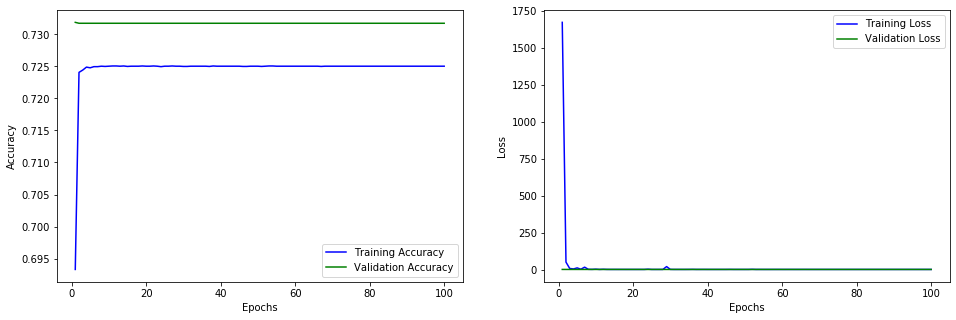

In [35]:
history_dict = history.history
history_dict.keys()

loss = history_dict['loss']
acc = history_dict['accuracy']
val_loss = history_dict['val_loss']
val_acc = history_dict['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [67]:
!ls

cyb.csv   dsa.ipynb dsa.tb
